In [1]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)



In [4]:
import tensorflow as tf

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
mnist = tf.keras.datasets.mnist

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
# normalizing 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [28]:
model = tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [30]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [31]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [32]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
# training the model

model.fit(x_train, y_train, epochs=3)

# saving the model

model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2617 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1049 - accuracy: 0.9674
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0716 - accuracy: 0.9771


INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [35]:
model_testing_phase = tf.keras.models.load_model('handwritten.model')

In [36]:
loss, accuracy = model_testing_phase.evaluate(x_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0920 - accuracy: 0.9706


In [37]:
print(loss)
print(accuracy)

0.09204133599996567
0.9706000089645386


In [46]:
import os
import cv2

This digit is probably a 1


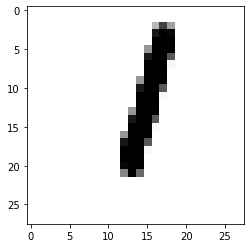

This digit is probably a 3


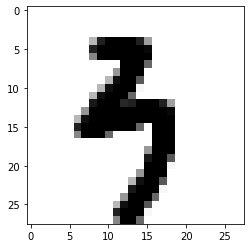

This digit is probably a 7


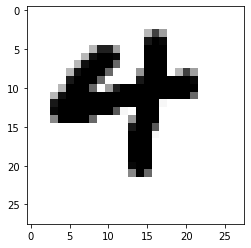

This digit is probably a 7


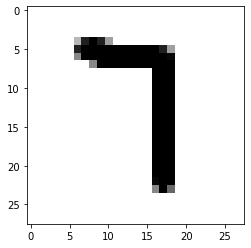

This digit is probably a 0


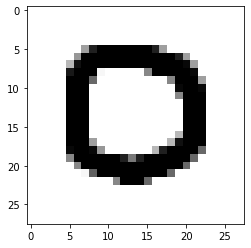

This digit is probably a 9


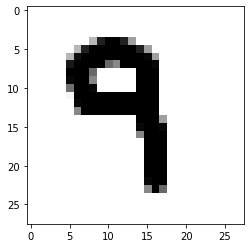

This digit is probably a 6


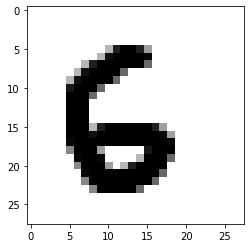

This digit is probably a 2


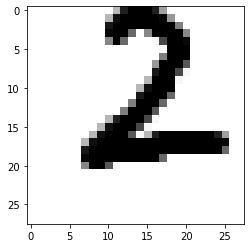

This digit is probably a 8


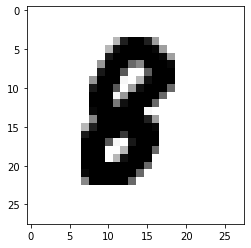

This digit is probably a 3


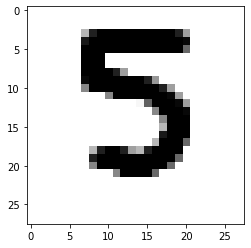

In [50]:
image_number = 1

while os.path.isfile(f"../DataSet/Random Tests image/img{image_number}.png"):
    try:
        img = cv2.imread(f"../DataSet/Random Tests image/img{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        pred = model(img)
        print(f"This digit is probably a {np.argmax(pred)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number += 1